In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)


In [ ]:
# Source: https://towardsdatascience.com/web-scraping-using-selenium-python-8a60f4cf40ab
wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')
#print(wd.page_source)

In [ ]:
user_message = wd.find_elements_by_xpath('//*[@id="Discussion_2864"]/div/div[2]/div/div[1]')[0] 
print(user_message.text)

Entry level performance luxury sedans are a hot area for car manufacturers and enthusiasts alike. These sedans show their performance by being fun to drive and handling well. They show luxury by offering leather and some of the important creatures comforts found in the most luxurious upscale sedans. The selection of vehicles that compete in the space is vast and varied.

The benchmarks which define this are the BMW 330 and the Audi A4 3.0. But there are many contenders, such as Acura TL-S, Chrysler 300M, Jaguar X-type, Infiniti I35, Mercedes C-Class, Volvo S60 T5. Some companies have contenders that emphasize performance Lexus IS300 or luxury Lexus ES300. And the field is continously growing, with the recent additions being the Cadillac CTS and Infiniti G35.

The common charateristics of this entry level perfomance luxury group seem to a price around 30 to 40k (US dollars) and 0-60 times between six and eight seconds.

With this wide variety of cars targeted at a similar market segment

In [ ]:
date = wd.find_elements_by_xpath('//*[@id="Discussion_2864"]/div/div[1]/div[2]/span[1]/a/time')[0] 
print(date.text)
time = date.get_attribute('title')
print(time)

March 2002
March 23, 2002 12:04PM


In [1]:
import pandas as pd
import numpy as np

In [ ]:
page_number_list = ['p'+str(x) for x in list(np.arange(2,330))]

In [ ]:
final_df_newest = pd.DataFrame()
for p in page_number_list:
  wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p')

  comments = pd.DataFrame(columns = ['Date','comments']) 
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[2]/div[2]/span/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,comment]
    
  final_df_newest = pd.concat([comments,final_df_newest])
print(final_df_newest.shape[0])

16400


In [ ]:
## Scraping for Old Posts

In [ ]:
page_number_list = ['p'+str(x) for x in list(np.arange(330,436))]

In [ ]:
final_df_oldest = pd.DataFrame()
for p in page_number_list:
  wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p')

  comments = pd.DataFrame(columns = ['Date','comments']) 
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_') and not (contains(@id,'blockquote'))]")

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[2]/div[2]/span/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="'+x+'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,comment]
    
  final_df_oldest = pd.concat([comments,final_df_oldest])
print(final_df_oldest.shape[0])

5300


In [ ]:
master_df = pd.concat([final_df_newest,final_df_oldest])

master_df.to_csv("results.csv")
!ls
from google.colab import files
files.download("results.csv")

In [2]:
from google.colab import files

In [5]:
files.upload()
master_df = pd.read_csv('results (1).csv')

In [6]:
# Taking newest 5000 comments
newest_df = master_df.tail(5000)

# Task A: Test Zipf's Law on the dataset

In [ ]:
import nltk
nltk.download('punkt')

In [8]:
from collections import Counter
p = Counter(" ".join(newest_df['comments']).split()).most_common(100)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

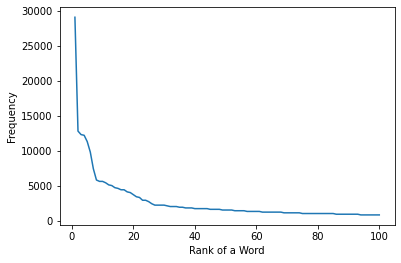

In [10]:
plt.plot(rslt.index+1,rslt['Frequency'])
plt.xlabel('Rank of a Word')
plt.ylabel('Frequency')

Based on the graph, we can see that rank and frequency of frequency distribution of words follow Zipf's law

Task B: Find Top 10 Brands

In [ ]:
# Remove stop words
nltk.download('stopwords')

In [12]:
from nltk.corpus import stopwords

In [ ]:
newest_df['comments'] = newest_df['comments'].apply(lambda x: x.lower())
newest_df['word_tokens'] = newest_df['comments'].apply(lambda x: nltk.word_tokenize(x))

def remove_stopwords(text):
  return [word for word in text if word not in stopwords.words('english')]

newest_df['comments_new'] = newest_df['word_tokens'].apply(remove_stopwords)
newest_df['comments_new'] = [' '.join(x) for x in newest_df['comments_new']]

In [ ]:
files.upload()
car_models = pd.read_csv('car models and brands.csv')

In [15]:
## Car Model-Brand cleaning

In [16]:
car_models.loc[car_models[car_models['Brand']=='mercedes-benz'].index[0],'Brand'] = 'mercedes'

In [17]:
model_brand_dict = car_models.set_index('Model').to_dict()['Brand']

In [ ]:
def replace_model_with_brands(text):
  data = text.split()
  #print(data)
  for idx,word in enumerate(data):
    if word in model_brand_dict:
      #print(word)
      data[idx] = model_brand_dict[word]

  data_new = ' '.join(data)
  return data_new

newest_df['comments_new_brand'] = newest_df['comments_new'].apply(replace_model_with_brands)

In [19]:
p = Counter(" ".join(newest_df['comments_new_brand']).split()).most_common()
rslt_wo_stopwords = pd.DataFrame(p, columns=['Word', 'Frequency'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

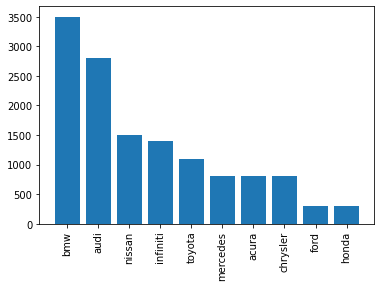

In [20]:
top_10_brands = rslt_wo_stopwords[rslt_wo_stopwords['Word'].isin(car_models['Brand'].unique())]
top_10_brands = top_10_brands[~top_10_brands['Word'].isin(['sedan','cars'])][1:11]
plt.bar(top_10_brands['Word'],top_10_brands['Frequency'])
plt.xticks(rotation='90')

Task C

In [ ]:
newest_df.drop(columns=['word_tokens','comments_new'],inplace=True)

In [22]:
a = pd.DataFrame(top_10_brands['Word'].unique(),columns=['Brand'])
a['Key'] = 1
b = pd.DataFrame(top_10_brands['Word'].unique(),columns=['Brand'])
b['Key'] = 1

top_brands_lift = pd.merge(a,b,on='Key',suffixes=['_a','_b'])
top_brands_lift.drop(columns=['Key'],inplace=True)

top_brands_lift['Lift'] = 0

top_brands_lift = top_brands_lift.drop_duplicates()

In [23]:
for i in range(len(top_brands_lift)):
  if (top_brands_lift['Brand_a'][i] == top_brands_lift['Brand_b'][i]):
    top_brands_lift.drop(index=i,inplace=True)

In [24]:
newest_df.reset_index(drop=True,inplace=True)

In [25]:
def calc_lift(brands):
  x = brands[0]
  y = brands[1]
  counter_a = 0
  counter_b = 0
  counter_a_b = 0
  for i in range(len(newest_df)):
    if str(x) in newest_df['comments_new_brand'][i]:
      counter_a+=1
    if str(y) in newest_df['comments_new_brand'][i]:
      counter_b+=1
    if (str(x) in newest_df['comments_new_brand'][i]) & (str(y) in newest_df['comments_new_brand'][i]):
      counter_a_b+=1
  return ((len(newest_df)*counter_a_b)/(counter_a*counter_b))

In [26]:
top_brands_lift['Lift'] = top_brands_lift[['Brand_a','Brand_b']].apply(calc_lift,axis=1)

In [28]:
lift_matrix = pd.crosstab(top_brands_lift['Brand_a'],top_brands_lift['Brand_b'],aggfunc='sum',values=top_brands_lift['Lift'],dropna=True)
lift_matrix

Brand_b,acura,audi,bmw,chrysler,ford,honda,infiniti,mercedes,nissan,toyota
Brand_a,,,,,,,,,,
acura,NaN,1.704545,1.339286,1.250000,1.562500,2.083333,1.388889,1.562500,1.250000,1.562500
audi,1.704545,NaN,1.623377,0.909091,1.136364,0.000000,1.515152,2.272727,0.909091,1.136364
bmw,1.339286,1.623377,NaN,1.428571,2.678571,0.000000,1.984127,0.892857,2.857143,1.339286
chrysler,1.250000,0.909091,1.428571,NaN,5.000000,6.666667,1.111111,5.000000,4.000000,5.000000
ford,1.562500,1.136364,2.678571,5.000000,NaN,4.166667,1.388889,3.125000,5.000000,3.125000
honda,2.083333,0.000000,0.000000,6.666667,4.166667,NaN,0.000000,4.166667,3.333333,4.166667
infiniti,1.388889,1.515152,1.984127,1.111111,1.388889,0.000000,NaN,0.000000,2.222222,0.694444
mercedes,1.562500,2.272727,0.892857,5.000000,3.125000,4.166667,0.000000,NaN,2.500000,3.125000
nissan,1.250000,0.909091,2.857143,4.000000,5.000000,3.333333,2.222222,2.500000,NaN,2.500000


In [29]:
top_brands_lift['Distance'] = 1/(top_brands_lift['Lift']+.1)

In [30]:
dis_matrix = pd.crosstab(top_brands_lift['Brand_a'],top_brands_lift['Brand_b'],aggfunc='sum',values=top_brands_lift['Distance'],dropna=True).fillna(0)
dis_matrix

Brand_b,acura,audi,bmw,chrysler,ford,honda,infiniti,mercedes,nissan,toyota
Brand_a,,,,,,,,,,
acura,0.000000,0.554156,0.694789,0.740741,0.601504,0.458015,0.671642,0.601504,0.740741,0.601504
audi,0.554156,0.000000,0.580256,0.990991,0.808824,10.000000,0.619137,0.421456,0.990991,0.808824
bmw,0.694789,0.580256,0.000000,0.654206,0.359897,10.000000,0.479817,1.007194,0.338164,0.694789
chrysler,0.740741,0.990991,0.654206,0.000000,0.196078,0.147783,0.825688,0.196078,0.243902,0.196078
ford,0.601504,0.808824,0.359897,0.196078,0.000000,0.234375,0.671642,0.310078,0.196078,0.310078
honda,0.458015,10.000000,10.000000,0.147783,0.234375,0.000000,10.000000,0.234375,0.291262,0.234375
infiniti,0.671642,0.619137,0.479817,0.825688,0.671642,10.000000,0.000000,10.000000,0.430622,1.258741
mercedes,0.601504,0.421456,1.007194,0.196078,0.310078,0.234375,10.000000,0.000000,0.384615,0.310078
nissan,0.740741,0.990991,0.338164,0.243902,0.196078,0.291262,0.430622,0.384615,0.000000,0.384615


Task D

In [32]:
from sklearn.manifold import MDS

In [ ]:
mds_plot = MDS(2,random_state=42)
mds = mds_plot.fit_transform(dis_matrix)

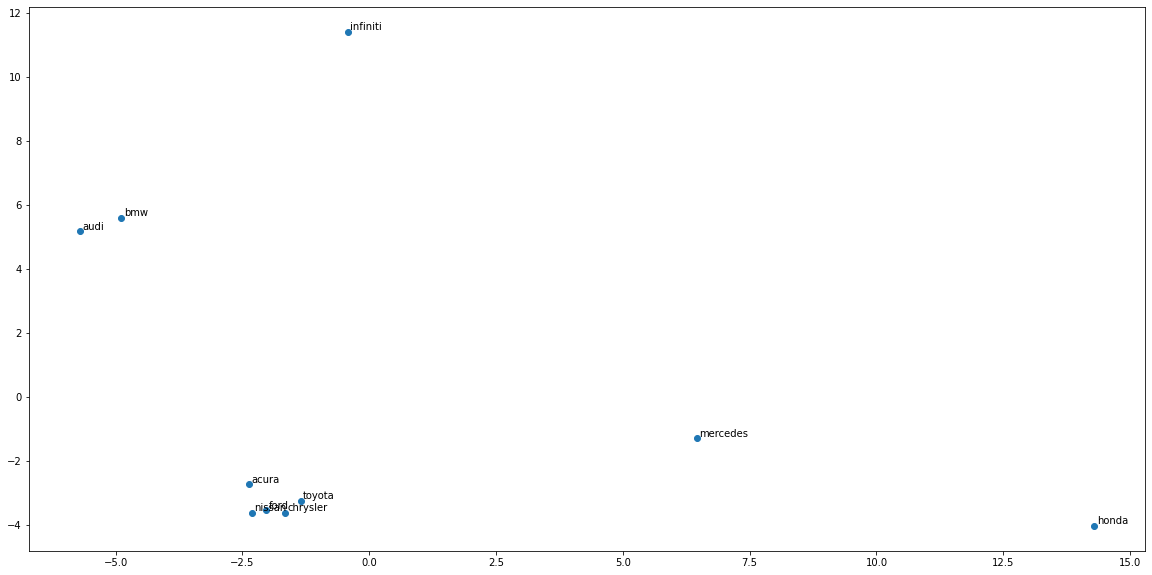

In [37]:
import random
x = [row[0] for row in mds]
y = [row[1] for row in mds]
plt.figure(figsize=(20,10))
plt.scatter(x,y)

for brand,a,b in zip(dis_matrix.index,x,y): 
  alpha = 0.05 
  plt.text(a+alpha,b+alpha,str(brand))

Task E
1. Based on Lift Table and MDS plot of the dissimilarity matrix, we can say there is a strong comenton of bmw and audi with nissan, ford, acura and chrysler. 
2. mercedes is at the far end which shows that it doesn't have many comentions with other brands. Similary infinity is at the other end of the matrix.

Task F

In [ ]:
newest_df['word_tokens'] = newest_df['comments_new_brand'].apply(lambda x: nltk.word_tokenize(x))

In [39]:
top_5_features = Counter(" ".join(newest_df['comments_new_brand']).split()).most_common(50)
top_5_features

[('.', 34500),
 (',', 25700),
 ('car', 7200),
 ("n't", 4300),
 (')', 4200),
 ("'s", 4000),
 ('(', 3700),
 ('?', 3600),
 ('bmw', 3500),
 ('audi', 2800),
 ('manual', 2600),
 ('performance', 2400),
 ('get', 2300),
 ('!', 2200),
 ('new', 2100),
 ('steering', 2100),
 ('also', 2000),
 ('one', 2000),
 ('g35', 2000),
 ('sedan', 1900),
 ('...', 1900),
 ('would', 1800),
 ("''", 1800),
 ('better', 1700),
 ('drive', 1700),
 ('think', 1600),
 ("'m", 1600),
 ('tl', 1600),
 ('``', 1500),
 ('like', 1500),
 ('s4', 1500),
 ('nissan', 1500),
 ('luxury', 1400),
 ('even', 1400),
 ('infiniti', 1400),
 ('price', 1300),
 ('good', 1300),
 ('looking', 1300),
 ('-', 1300),
 ('engine', 1200),
 ('lexus', 1200),
 ('torque', 1200),
 ('best', 1100),
 ('fwd', 1100),
 ('toyota', 1100),
 (':', 1100),
 ('want', 1100),
 ('interior', 1000),
 ('es300', 1000),
 ('right', 1000)]

In [40]:
top_5_features_list = ['manual','performance','steering','luxury','engine']

In [41]:
# Lift Analysis of Top 5 features with Top 10 Brands

In [42]:
a = pd.DataFrame(top_10_brands['Word'].unique(),columns=['Brand_a'])
a['Key'] = 1

b = pd.DataFrame(top_5_features_list,columns=['features'])
b['Key'] = 1

brand_features = pd.merge(a,b,on='Key')
brand_features.drop(columns=['Key'],inplace=True)

brand_features['Lift'] = 0

In [43]:
brand_features['Lift'] = brand_features[['Brand_a','features']].apply(calc_lift,axis=1)

In [46]:
lift_matrix = pd.crosstab(brand_features['Brand_a'],brand_features['features'],aggfunc='sum',values=brand_features['Lift'],dropna=True)
lift_matrix

features,engine,luxury,manual,performance,steering
Brand_a,,,,,
acura,1.388889,1.875000,0.416667,1.041667,3.125000
audi,1.010101,2.272727,0.909091,1.515152,1.136364
bmw,1.587302,2.142857,1.666667,1.785714,1.339286
chrysler,1.111111,1.000000,0.000000,1.666667,2.500000
ford,2.777778,2.500000,0.833333,2.083333,1.562500
honda,0.000000,0.000000,0.000000,1.851852,0.000000
infiniti,1.234568,1.666667,1.481481,0.925926,0.694444
mercedes,2.777778,1.250000,0.000000,1.388889,1.562500
nissan,1.111111,2.000000,0.666667,1.666667,1.250000


In [47]:
brand_features.loc[brand_features.groupby(['Brand_a'])['Lift'].idxmax()]

,Brand_a,features,Lift
32,acura,steering,3.125000
8,audi,luxury,2.272727
3,bmw,luxury,2.142857
37,chrysler,steering,2.500000
44,ford,engine,2.777778
46,honda,performance,1.851852
18,infiniti,luxury,1.666667
29,mercedes,engine,2.777778
13,nissan,luxury,2.000000
22,toyota,steering,1.562500


Task G

Based on the Lift analysis of top 10 brands and top 5 most talked about features, we can see that audi, bmw, infiniti and nissan have luxury as their features while mercedes has engine as the most talked about.

**Task** H

To find the most aspirational brand, we find words synonymous with aspire or aspirational and see which brand is associated with aspirational words the most.

In [49]:
lt_asp_wrds=['desire to','desirable','fancy car','eager to buy','would like to buy','love to have',
             'dream car','really want','future car','dream of',"cant wait to buy",'would love to buy',
             'wish to buy','want to buy','aspire to','future car','thinking to buy','love to buy',
             'want to own','love to own','like to own','have to own','nice to own','nice to buy',
             'have to buy','would love to buy','would like to buy','wish to own','looking to buy',
             'looking forward to buy']

In [ ]:
pattern='|'.join(lt_asp_wrds)

newest_df['msg_aspire']=newest_df['comments_new_brand'].str.replace(pattern,'aspire')

In [ ]:
newest_df['msg_aspire'][0].split(' ')

In [56]:
def calc_lift_aspire(brands):
  x = brands[0]
  y = brands[1]
  counter_a = 0
  counter_b = 0
  counter_a_b = 0
  for i in range(len(newest_df)):
    if str(x) in newest_df['msg_aspire'][i]:
      counter_a+=1
    if str(y) in newest_df['msg_aspire'][i]:
      counter_b+=1
    if (str(x) in newest_df['msg_aspire'][i]) & (str(y) in newest_df['msg_aspire'][i]):
      counter_a_b+=1
  return ((len(newest_df)*counter_a_b)/(counter_a*counter_b))

In [57]:
a = pd.DataFrame(top_10_brands['Word'].unique(),columns=['Brand_a'])
a['Key'] = 1

b = pd.DataFrame(['aspire'],columns=['aspirational'])
b['Key'] = 1

aspirational_brand = pd.merge(a,b,on='Key')
aspirational_brand.drop(columns=['Key'],inplace=True)

aspirational_brand['Lift'] = 0

In [58]:
aspirational_brand['Lift'] = aspirational_brand[['Brand_a','aspirational']].apply(calc_lift_aspire,axis=1)
aspirational_brand

,Brand_a,aspirational,Lift
0,bmw,aspire,3.571429
1,audi,aspire,0.000000
2,nissan,aspire,10.000000
3,infiniti,aspire,5.555556
4,toyota,aspire,0.000000
5,mercedes,aspire,0.000000
6,acura,aspire,0.000000
7,chrysler,aspire,0.000000
8,ford,aspire,12.500000
9,honda,aspire,0.000000


Based on the Lift:
1. People want to buy or aspire about Ford and Nissan the most. 
2. in the luxury segment, we can see bmw to be the most aspirational.